# Introduction

The purpose of this project is to analyze species biodiversity from the National Park Service. 

This project will use various forms of data visualization to help explain the findings. And some statistical methods to find significance.

This project seeks to answer the following questions:


 - What is the distribution of the conservation status of the animals?
 - What is the distribution of endangered species?
 - What species were spotted most at each park?
 - Are the differences between species and their conservation status significant?

This project will use 2 CSV files. `Observations.csv` has the number of observations of each species and what park. And `Species.csv` has the category(of the species e.g. bird or mammal), common name, and conservation status of each species.

The data is `based on real data and is not real`. This dataset is provided by Codecademy.

## Goals and Perspective


The perspective of this project will be a data analyst for the National Park Service. They are looking for trends in the data and answering the questions above. The National Park Service wants to improve or maintain the current biodiversity at their parks. 

This project will be split into three parts.

### Loading and Exploring the data
In this section, the data will be loaded so it can be used. In this section, the data will be discussed.

### Analysis
In this section, the questions posed in the introduction will be answered. And any other notable trends will be talked about.

### Conclusion 
Finally, the findings and their practical use will be discussed. And the potential flaws of the analysis will be discussed.

# Loading and Exploring the Data

### Import Python Modules

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In this project, I will be using mostly pandas data frames. We can directly load the data from the CSV files into data frames using Pandas. We can use a df to perform many kinds of analysis.

In this project `df` is an abbreviation that stands for dataframe.

In [7]:
observations_df = pd.read_csv('observations.csv') # loads observation.csv into a df(dataframe)
species_df = pd.read_csv('species_info.csv') # loads species.csv into a df(dataframe)

## Species Data Exploring

We'll start with the species data. The CSV contains four columns.

- category(e.g. Mammal, bird, reptile)
- scientific_name(the scientific name of the animal)
- common_names(the common name of the animal e.g. Fox, Elk, Bison, Deer, Sheep, etc)
- conservation_status(the status of conservation for the animal)

In [100]:
print(species_df.dtypes)
species_df.head() # prints first 5 rows

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


All of the datatypes are objects. However, at the moment we do not need to change any columns to floats or int. In fact there's no numerical data in any of these columns.

### Looking for Null values

In [12]:
print(species_df['conservation_status'].isnull().sum()) # total number of null values
num_not_null = len(species_df['conservation_status']) - species_df['conservation_status'].isnull().sum() # total number of non-null values
print(num_not_null)
print(species_df['conservation_status'].unique()) # categories of conservation

5633
191
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


The first five rows of the conservation_status column are NaN or null. NaN which stands for `not a number` is also known as null and used to represent undefined data.

The `total length` of the species data frame is `5824`.

The species data frame has `5633` Nan or `null` values in the conservations_status column.

`191` are `not null`. 

In the `conservation status column` there are `four categories` of conservation not including null:

- Species of Concern
- Endangered
- Threatened
- In Recovery

Data with NaN or null values needs to be handled carefully. 
There are a few different methods that can be used. However, for the sake of this project and data, `any row without a conservation status likely means the animal does not have a conservation status`.


In [14]:
print(f"Total number of species: {species_df.scientific_name.nunique()}")

Total number of species: 5541


In [15]:
category_list = species_df['category'].unique() # a list of the count of each animals catrgory
category_list

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

There are `seven` different categories of animals in the species data. With `5541` different kinds of species. We will explore the distribution of these categoires later.

## Observations Data Exploring

The observation data is made up of three columns:

- Scientific_name(scientific name of the animal)
- park_name(the name of the park)
- observations(number of observations of that animal)

In [18]:
print(observations_df.dtypes)
observations_df.head() # prints the first five rows and their datatypes

scientific_name    object
park_name          object
observations        int64
dtype: object


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [19]:
print(observations_df.isnull().sum()) # df has no null values

scientific_name    0
park_name          0
observations       0
dtype: int64


The observations data has no null values in any columns.

In [21]:
print(f"Total number of species: {observations_df.scientific_name.nunique()}")

Total number of species: 5541


Similar to the species df there are 5541 different kinds of species. Both files likley have the same species.

In [23]:
print(f"Parks: {observations_df.park_name.unique()}")

Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


There are `four different parks` in the observation data:

- Great Smoky Mountains National Park 
- Yosemite National Park
- Bryce National Park
- Yellowstone National Park


In [25]:
print(f"Total Number of observations: {observations_df.observations.sum()}")

Total Number of observations: 3314739


There are `3,314,739 total observations` of the 5541 species.

# Analysis of Data

In this section, we will answer the questions posed in the introduction and search for any trends. 
We will also look at many distributions found in the data.

## Distribution of species and conservation status

In [104]:
category_list_counts = species_df['category'].value_counts() # a list of the count of each animals category
category_list_counts

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64

Vascular plants are the most common category with reptiles being the least. To better see this distribution refer to the graph below.

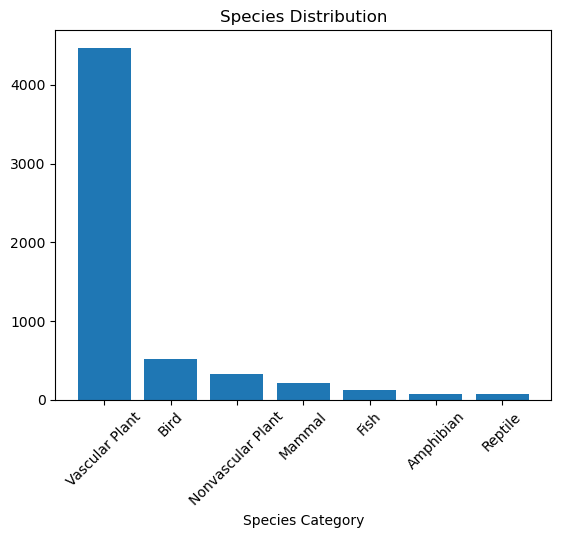

In [31]:
plt.bar(category_list_counts.index, category_list_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Species Category")
plt.title("Species Distribution")

plt.show()
plt.close()

In [32]:
conservation_count_list = species_df['conservation_status'].value_counts() # a list of the counts of conservation statuses
conservation_count_list

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

Of the 191 not null values in conservation status 161 are species of concern. To see the distribution of conservation satuts refer to the graph below.

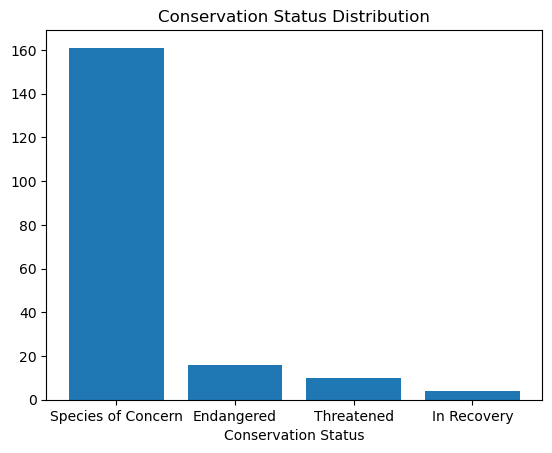

In [34]:
plt.bar(conservation_count_list.index, conservation_count_list.values)
plt.title("Conservation Status Distribution")
plt.xlabel("Conservation Status")
plt.show()
plt.close() 

## What is the distribution of the conservation status of the animals?
This was the first question posed in the introduction. We will use the graph below to answer it.

To easily see the distribution of conservation status of the animals. We can use a stacked bar plot.

First, we will create a contingency table to graph a stacked bar plot with pandas.

In [37]:
table = pd.crosstab(species_df['conservation_status'], species_df['category'])
table

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,7,0,0,1
In Recovery,0,3,0,1,0,0,0
Species of Concern,4,72,4,28,5,5,43
Threatened,2,0,4,2,0,0,2


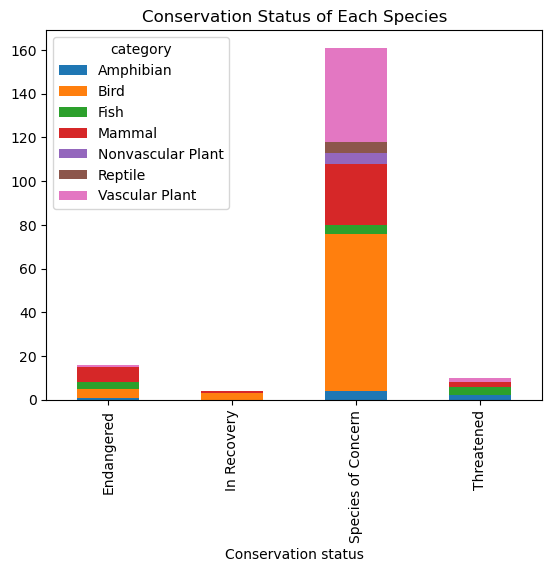

In [38]:
table.plot(kind='bar', stacked=True)
plt.title("Conservation Status of Each Species")
plt.xlabel("Conservation status")
plt.show()
plt.close()

The most common conservation status is species of concern by a large margin. We found earlier that 161 of the 191 species with a conservation were species of concern. 

Based on the plot the `most common category in species of concern` are `Birds, Vascular plants and Mammals`.

This insight may be used to help us understand trends over time. For example, if this analysis was conducted at a future date and the most common species of concern switched from birds to fish. 
We could then try to understand what may be causing fish to become a species of concern and work to prevent it.

## What is the distribution of endangered species?
This is the second question in the introduction.

To answer this question we can create a subset a data. This subset will only have animals with the endangered conservation status.

In [42]:
endangered_df_temp = species_df[species_df['conservation_status'] == 'Endangered']
endangered_df = endangered_df_temp.copy().reset_index() # a df of endangered species
endangered_df

,index,category,scientific_name,common_names,conservation_status
0,8,Mammal,Canis lupus,Gray Wolf,Endangered
1,9,Mammal,Canis rufus,Red Wolf,Endangered
2,34,Mammal,Myotis grisescens,Gray Myotis,Endangered
3,39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
4,72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
5,173,Bird,Grus americana,Whooping Crane,Endangered
6,276,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
7,343,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered
8,540,Fish,Etheostoma percnurum,Duskytail Darter,Endangered
9,570,Fish,Noturus baileyi,Smoky Madtom,Endangered


In [43]:
endangered_species = endangered_df.groupby('category').size()
endangered_species

category
Amphibian         1
Bird              4
Fish              3
Mammal            7
Vascular Plant    1
dtype: int64

We do not have many observations on endangered species. With only 16 total. However, of those 16 mammals are the most endangered having 7.

Also notably `there are no reptile or nonvascular plant species that are endangered.`

Below is a graph of the distribution of endangered species.

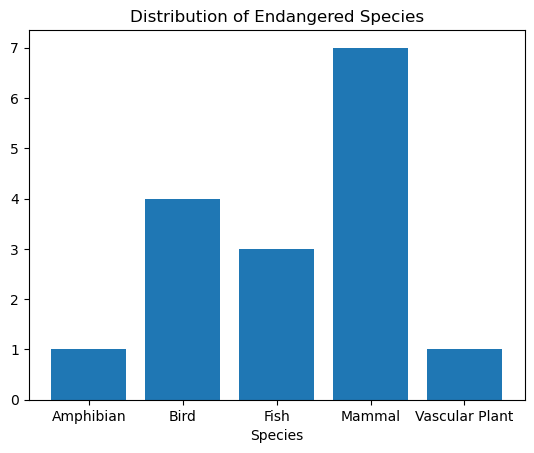

In [45]:
plt.bar(endangered_species.index, endangered_species.values)
plt.title("Distribution of Endangered Species")
plt.xlabel("Species")
plt.show()
plt.close()

## What species were spotted most at each park?
This is the third question in the introduction.

Here I merged the two dataframes and grouped by park name and category. This gives us a new data frame of the number of observations of each species category at each park.

In [48]:
merged_df = pd.merge(observations_df, species_df, how='right', on='scientific_name') # merges both df. Using a right join
merged_df

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Clethrionomys gapperi gapperi,Bryce National Park,130,Mammal,Gapper's Red-Backed Vole,NaN
1,Clethrionomys gapperi gapperi,Yellowstone National Park,270,Mammal,Gapper's Red-Backed Vole,NaN
2,Clethrionomys gapperi gapperi,Great Smoky Mountains National Park,98,Mammal,Gapper's Red-Backed Vole,NaN
3,Clethrionomys gapperi gapperi,Yosemite National Park,117,Mammal,Gapper's Red-Backed Vole,NaN
4,Bos bison,Yosemite National Park,128,Mammal,"American Bison, Bison",NaN
...,...,...,...,...,...,...
25627,Vitis californica,Yellowstone National Park,237,Vascular Plant,"California Grape, California Wild Grape",NaN
25628,Tribulus terrestris,Great Smoky Mountains National Park,50,Vascular Plant,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN
25629,Tribulus terrestris,Yellowstone National Park,239,Vascular Plant,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN
25630,Tribulus terrestris,Bryce National Park,111,Vascular Plant,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN


Using the merged df we can group by the park and observation columns. Then take the sum of the observation columns for each park. This will return a df of the number of observations for each species at each park.

In [50]:
num_park_observations = merged_df.groupby(['park_name', 'category'])['observations'].sum()
num_park_observations = num_park_observations.reset_index() # a df with num observations of each category at each park
num_park_observations

,park_name,category,observations
0,Bryce National Park,Amphibian,7542
1,Bryce National Park,Bird,58590
2,Bryce National Park,Fish,12823
3,Bryce National Park,Mammal,28830
4,Bryce National Park,Nonvascular Plant,32992
5,Bryce National Park,Reptile,8141
6,Bryce National Park,Vascular Plant,484373
7,Great Smoky Mountains National Park,Amphibian,5876
8,Great Smoky Mountains National Park,Bird,42869
9,Great Smoky Mountains National Park,Fish,9482


This data frame can be used for further analysis. To better see the distribution I will graph it. Similar to when we were graphing the distribution of conservation status we will use a stacked bar plot. 

This time the df can be pivoted.

In [52]:
# makes a df so each sspecies is its own column. Makes it easier to plot the distribution of species per park
pivot_df = num_park_observations.pivot(index='park_name', columns='category', values='observations')
pivot_df

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,7542,58590,12823,28830,32992,8141,484373
Great Smoky Mountains National Park,5876,42869,9482,21056,24857,5841,364882
Yellowstone National Park,19937,144300,31459,70701,83021,20061,1218162
Yosemite National Park,11713,86612,19137,42533,49783,11779,727895


Each row here is the park with the number of observations for a species category.

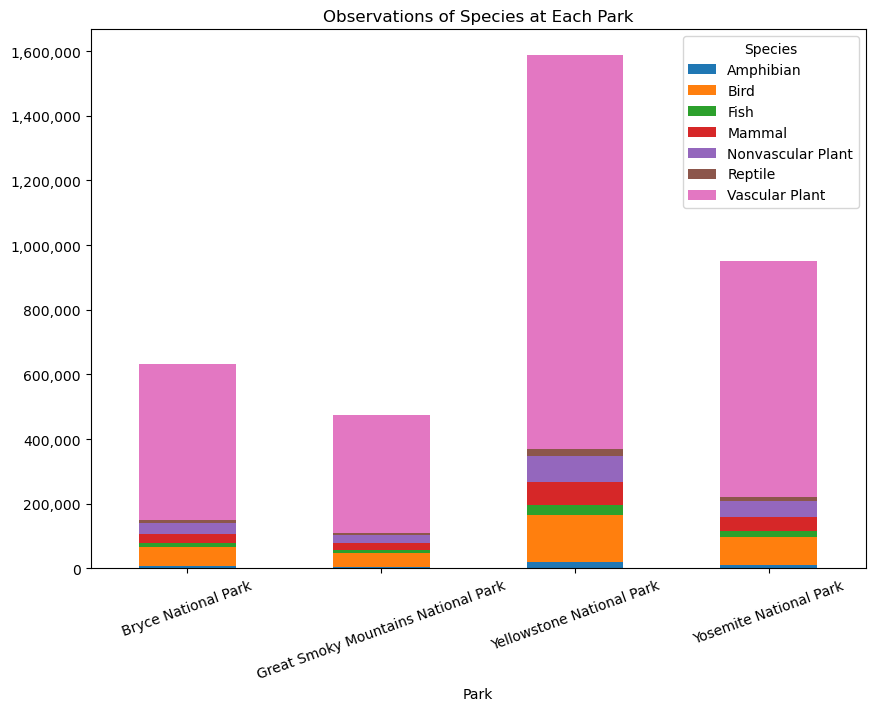

In [54]:
from matplotlib.ticker import FuncFormatter

pivot_df.plot(kind='bar', stacked=True, figsize=(10,7))
plt.xticks(rotation=20)
plt.legend(title='Species')

plt.title('Observations of Species at Each Park')
plt.xlabel('Park')

# formats the y-axis as whole numbers instead of scientific notation
def y(x, pos):
    return f'{int(x):,}'  
plt.gca().yaxis.set_major_formatter(FuncFormatter(y))


plt.show()
plt.close()

Yellowstone has the most observations and most of them were vascular plants. In fact, the majority of all observations at each park are vascular plants followed by birds.

This graph can be used to determine how each park changes over time. If for example, Yosemite experiences massive sudden loss of plant life. That trend would appear on this graph.

##  Are the differences between species and their conservation status significant?
This is the fourth and final question from the introduction. 

To answer this question we will use a `chi-square test of independence`.

First, to preform a chi-square test we need to create a contingency table. 

In [58]:
con_table = pd.crosstab(merged_df['category'], merged_df['conservation_status'])
con_table

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,4,0,16,8
Bird,16,12,320,0
Fish,12,0,16,20
Mammal,44,12,168,8
Nonvascular Plant,0,0,20,0
Reptile,0,0,20,0
Vascular Plant,4,0,172,8


A good rule of thumb is that all cells have a count of 5 or more. We have 2 cells that have a count of 4. For this project, we will ignore this rule of thumb. See Conclusion.

Now that we have a contingency table we can perform the test. 

 `The null hypothesis is that no association exists between species and conservation status. The distribution of conservation status is the same across all categories.`

 `The alternative hypothesis is that an association does exist. The distribution of conservation status varies across categories.`

The level of significance for this test is 5% or 0.05.

In [60]:
import scipy.stats as stats

test_stat, p_value, dof, expected = stats.chi2_contingency(con_table)
print(f"Test_Stat: {test_stat}")
print(f"p-value: {p_value}")

Test_Stat: 281.6928573184134
p-value: 2.7594442674479634e-49


Our p-value is close to 0. Much less than 0.05. 

This means that we reject the null hypothesis in favor of the alternative. 

`Practically speaking this means that the difference between species and their conservation status is significant.`

# Conclusion

In this project, many visualizations were made to help us make inferences and conclusions based on the data.

The visualizations and trends discovered in this project may be used for benchmarking and further research. 
This project can help us understand what types of species are most common in these parks and which are in conservation.


We were able to answer all four of the questions that were asked.

`What is the distribution of conservation status of the animals?`

Most of the animals had no conservation status at all. Of the 5824 total rows in the column, only 191 rows or animals had a conservation status.

Most animals were species of concern with 161 out of 191. Followed by the endangered category at only 16.
The most common animals in species of concern were birds, vascular plants, and mammals. This makes sense as these are some of the most frequent animals in the species dataset.
   
`What is the distribution of endangered species?`

Mammals and birds were the most likely. Interestingly, there were no reptile or nonvascular plant species that were endangered in the data.
   
`What species were spotted most at each park?`

The most spotted species at all of the parks were vascular plants followed by birds. Again this makes sense as they're some of the most frequent in the data.
Yellowstone Park had the most number of observations. 
   
`Are the differences between species and their conservation status significant?`

Yes, the difference between species and their conservation status is statistically significant.
   

I expected some of these results. Plants make sense being the most common in the dataset. Many of these parks have forests. What surprised me was that most of the animals had no conservation status. Which is a good thing in the grand scene of things(if NAN means no conservation status). I also expected the difference between species and conservation status to be significant because many species face different threats and are affected differently by changes in their environment.

## Further Analysis and Pitfalls

This project can be expanded upon. In any of the questions asked the `common name` and `scientific name` columns were not used. They may be used to analyze the exact animal distribution instead of the exact category. For example, we could look at the distribution of bird species in Yellowstone Park. Or we could have looked at the exact distribution of animals that had a conservation status. However, this is beyond the scope of this project. 

More data is needed on endangered species. With only 16 animals in the data, it is not enough to create a definite answer. Perhaps, there are just not that many animals that are endangered which is a good thing. To better determine if species are more likely to be or become endangered statistical methods should be used. However, that is beyond the scope of this project.

The data used in this project may also be expanded upon or improved. In the conservation status column, a placeholder for no conservation status should be used. It is impossible to know which values are missing and which ones were left out intentionally. Adding a status that is clear like `No Intervention` would be useful. Then the Nan values would be more meaningful as missing.

In the section, the contingency table was created for the chi-square test. Instead of ignoring the 5-count rule. The threatened and endangered categories could have been combined. However, for the scope of this project, 4 was sufficiently close to 5.